Sec-2 : Q.2 part 1

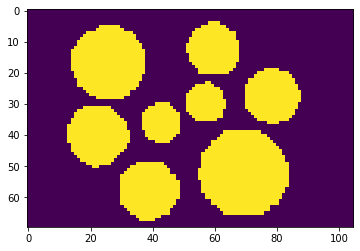

In [ ]:
import cv2
import numpy as np

def FillHole(mask):
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    len_contour = len (contours)
    contour_list = []
    for i in range(len_contour):
        drawing = np.zeros_like(mask, np.uint8) 
        img_contour = cv2.drawContours(drawing, contours, i, (255, 255, 255), -1)
        contour_list.append(img_contour)

    out = sum(contour_list)
    return out

if __name__ == '__main__':
    mask_in = cv2.imread('Fig1.png', 0)
    mask_out = FillHole(mask_in)
    cv2.imwrite('Fig1.png', mask_out)

plt.imshow(mask_out)


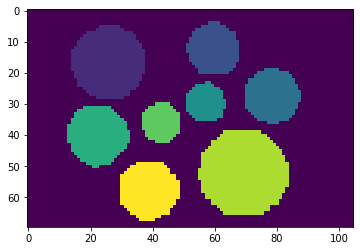

In [ ]:
plt.imshow(labels_im)

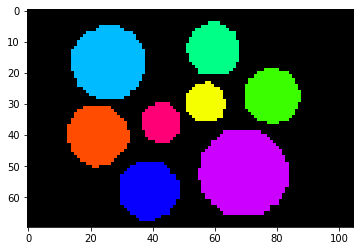

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


img = cv2.imread('Fig1.png', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  
num_labels, labels_im = cv2.connectedComponents(img)

def imshow_components(labels):
    
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    
    labeled_img[label_hue==0] = 0

    cv2.imwrite('labeled.png', labeled_img)
    plt.imshow(labeled_img)
    cv2.waitKey()

imshow_components(labels_im)

Q.3

In [ ]:
from itertools import groupby

def nonoverlapping(hits):
    nonoverlap = []
    overst =  False
    for i in range(1,len(hits)):
        (p, c) = hits[i-1], hits[i]
        if c[2] > p[3]:
            if not overst: nonover.append(p)
            nonover.append(c)
            overst = True  
    return nonoverlap

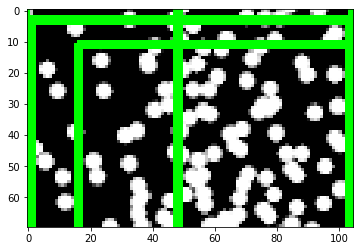

In [ ]:
import matplotlib.pyplot as plt
import cv2 

img_file= "Fig2.png"

img= cv2.imread(img_file)

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

im_gauss = cv2.GaussianBlur(gray_img, (5, 5), 0)
ret, thresh = cv2.threshold(im_gauss, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

margin = 40

for con in contours:
    area = cv2.contourArea(con)
    if 100 < area < 500:
        x,y,w,h = cv2.boundingRect(con)
        cv2.rectangle(img, (x-margin, y-margin), (x + w+margin, y + h+margin), (0,255,0), 2)
        
plt.imshow(img, cmap='gray')

In [ ]:
print(len(contours))

41
